# Pandas

Natasha Watkins

## Pandas 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Problem 1

In [2]:
s = pd.Series(index=range(0, 50, 2))
s = pd.Series([i**2 - 1 for i in s.index])
s[s % 3 == 0] = 0
s

0       -1
1        0
2        0
3       35
4        0
5        0
6      143
7        0
8        0
9      323
10       0
11       0
12     575
13       0
14       0
15     899
16       0
17       0
18    1295
19       0
20       0
21    1763
22       0
23       0
24    2303
dtype: int64

### Problem 2

In [3]:
def random_walk(p, d=100):
    index = pd.date_range(start='2000/1/1', end='2000/12/31')
    s = pd.Series(data=np.random.binomial(1, p, size=len(index)), index=index)
    s[0] = d
    s = s.cumsum()
    s[s < 0] = 0
    return s   

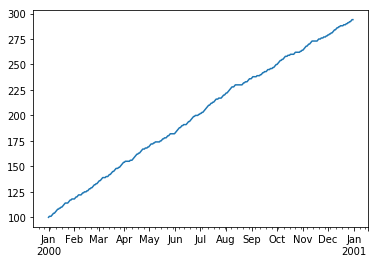

In [4]:
random_walk(0.5).plot()
plt.show()

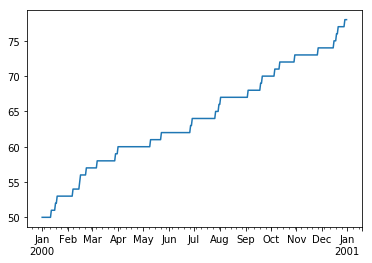

In [5]:
random_walk(0.1, d=50).plot()
plt.show()

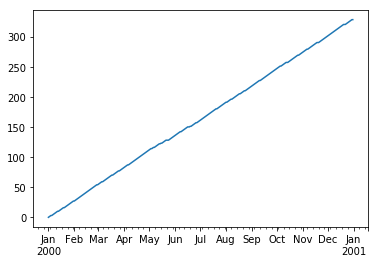

In [6]:
random_walk(0.9, d=0).plot()
plt.show()

### Problem 3

In [7]:
name = ['Mylan', 'Regan', 'Justin', 
        'Jess', 'Jason', 'Remi', 
        'Matt', 'Alexander', 'JeanMarie']

sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name,
                            'Sex': sex, 'Age': age,
                            'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 
                         'Math_Major': major})

In [8]:
studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] == 'M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


### Problem 4

In [9]:
pd.merge(studentInfo[studentInfo['Sex'] == 'M'], mathInfo, on='ID')

,Age,Class,ID,Name,Sex,Grade,Math_Major
0,20,Sp,0,Mylan,M,4.0,y
1,20,J,6,Matt,M,3.0,n


### Problem 5

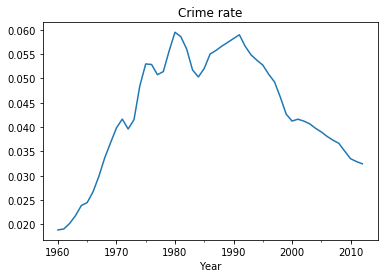

In [10]:
crime = pd.read_csv('crime_data.txt', 
                    skiprows=1, index_col=0)
crime.index = pd.to_datetime(crime.index, format='%Y')
crime['Crime Rate'] = crime['Total'] / crime['Population']
crime['Crime Rate'].plot(title='Crime rate')
plt.show()

Top 5 years for crime...

In [11]:
crime['Crime Rate'].sort_values(ascending=False)[:5]

Year
1980-01-01    0.059500
1991-01-01    0.058978
1981-01-01    0.058582
1990-01-01    0.058203
1989-01-01    0.057410
Name: Crime Rate, dtype: float64

Average number of total crimes...

In [12]:
crime['Total'].mean()

10638068.075471697

Average number of bulglaries between 1960 and 2012...

In [13]:
crime['1960':'2012'].Burglary.mean()

2446286.2075471696

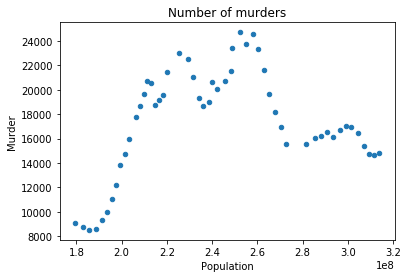

In [14]:
crime.plot(x='Population', y='Murder', kind='scatter', 
           title='Number of murders', legend=False)

In [15]:
crime[['Population', 'Violent', 'Robbery']].to_csv('crime_subset.csv')

### Problem 6

In [49]:
titanic = pd.read_csv('titanic.csv')
titanic = titanic.drop(["Sibsp", "Parch", "Cabin", "Boat", "Body", "home.dest"], axis=1)
titanic.dropna(subset=['Survived'], inplace=True)
titanic.Survived.replace({1: True, 0: False}, inplace=True)
titanic.Age.fillna(titanic.Age.mean())
titanic.to_csv('titanic_clean.csv')

Number survived...

In [52]:
titanic.Survived.sum()

500

Percentage survived...

In [54]:
titanic.Survived.sum() / len(titanic) * 100

38.19709702062643

Average price per ticket...

In [56]:
titanic.Fare.mean()

33.29547928134572

Most expensive ticket...

In [57]:
titanic.Fare.max()

512.3292

Oldest survivor...

In [59]:
titanic[titanic.Survived].Age.max()

80.0

Youngest survivor...

In [60]:
titanic[titanic.Survived].Age.min()

0.1667

Oldest non-survivor...

In [61]:
titanic[titanic.Survived == False].Age.max()

74.0

Youngest non-survivor

In [62]:
titanic[titanic.Survived == False].Age.min()

0.3333

## Pandas 2

In [16]:
from pydataset import data

london_births = data('Arbuthnot')
london_births.set_index('Year', inplace=True)

There were consistently more males born in each year than females over the time period... (at least according to the data)

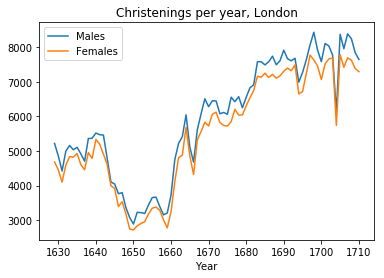

In [17]:
london_births[['Males', 'Females']].plot()
plt.title('Christenings per year, London')
plt.show()

There were many deaths from the plague in 1665...

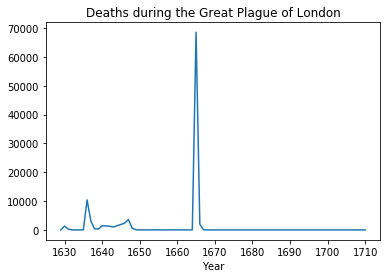

In [18]:
london_births['Plague'].plot()
plt.title('Deaths during the Great Plague of London')
plt.show()

Births declined sharply during the Great Plague of London...

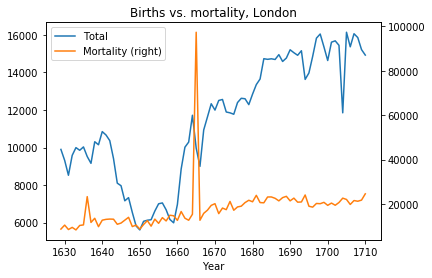

In [19]:
london_births.Total = london_births.Total * 1000
london_births[['Total', 'Mortality']].plot(secondary_y='Mortality')
plt.title('Births vs. mortality, London')
plt.show()

**Source**

Arbuthnot, John (1710). "An argument for Devine Providence, taken from the
constant Regularity observ'd in the Births of both Sexes," _Philosophical
transactions_, 27, 186-190. Published in 1711.

## Pandas 3

### Problem 1

**Iris**

Sentosa is the easiest to distinguish from others by looking at the ratio between petal and sepal lengths/widths

In [20]:
iris = data('iris')

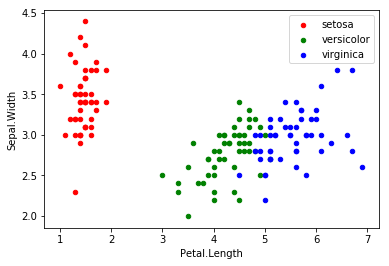

In [21]:
colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()

for species, color in zip(iris['Species'].unique(), colors):
    iris[iris['Species'] == species].plot(x='Petal.Length', y='Sepal.Width', kind='scatter', 
                                          ax=ax, c=color, label=str(species))
plt.show()

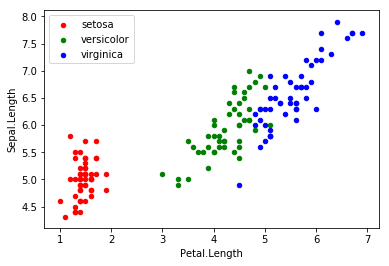

In [22]:
fig, ax = plt.subplots()

for species, color in zip(iris['Species'].unique(), colors):
    iris[iris['Species'] == species].plot(x='Petal.Length', y='Sepal.Length', kind='scatter', 
                                          ax=ax, c=color, label=str(species))
plt.show()

**Poisons**

Poison 3 is the most deadly on average, while treatment A is most effective on average

A is always the most effective treatment when poisoned

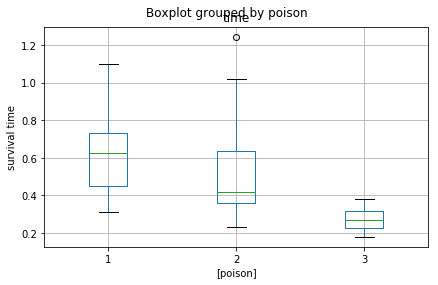

In [23]:
poisons = data('poisons')
poisons.boxplot(by='poison')
plt.tight_layout()
plt.ylabel('survival time')
plt.show()

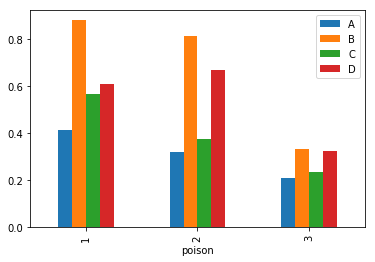

In [24]:
poisons.groupby(['poison', 'treat']).mean().unstack().plot(kind='bar')
plt.legend(poisons.treat.unique())
plt.show()

**Diamonds**

Price increases with quality of cut, and increases with higher color grade.

In [50]:
diamonds = data('diamonds')

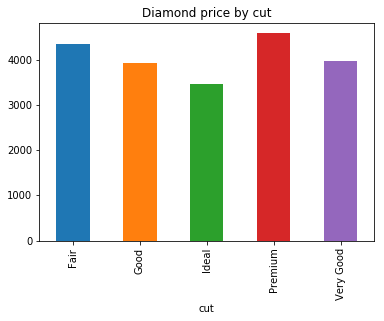

In [49]:
diamonds.groupby('cut')['price'].mean().plot(kind='bar')
plt.title('Diamond price by cut')
plt.show()

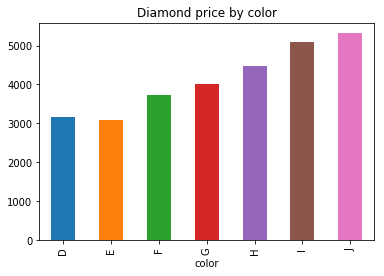

In [48]:
diamonds.groupby('color')['price'].mean().plot(kind='bar')
plt.title('Diamond price by color')
plt.show()

Diamonds are more likely to be bigger on average for diamonds with lower cut quality, which may explain their higher average price.

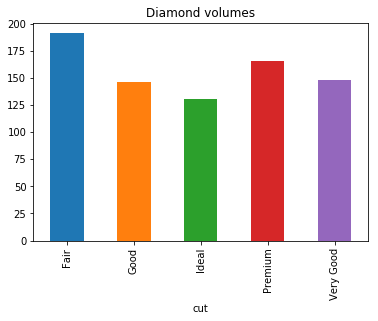

In [47]:
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds[diamonds.color == 'H'].groupby('cut')['volume'].mean().plot(kind='bar')
plt.title('Diamond volumes')
plt.show()

## Pandas 4

### Problem 1

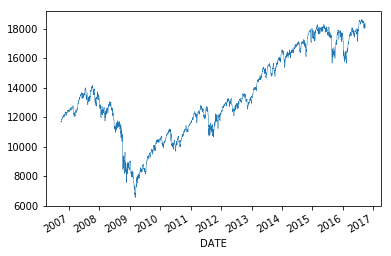

In [139]:
djia = pd.read_csv('DJIA.csv', index_col=0, parse_dates=True)
djia = pd.to_numeric(djia.VALUE, errors='coerce')
djia = djia.dropna()
djia.plot(lw=0.5)
plt.show()

### Problem 2

In [107]:
paychecks = pd.read_csv('paychecks.csv', squeeze=True, header=None)
paychecks.index = pd.date_range(start='2008/3/13', periods=93, freq="2W-FRI")

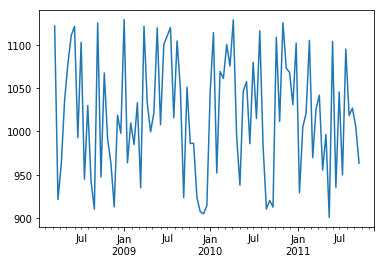

In [109]:
paychecks.plot()
plt.show()

### Problem 3

In [110]:
finances = pd.read_csv('finances.csv')

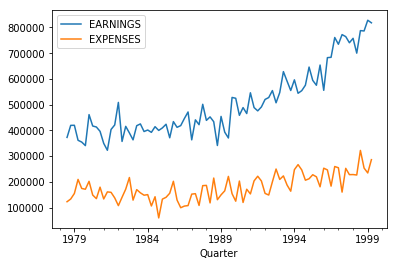

In [121]:
index = pd.period_range(start='1978/9', periods=len(finances), freq='Q')
finances.index = index
finances.plot()
plt.xlabel('Quarter')
plt.show()

### Problem 4

In [231]:
websites = pd.read_csv('website_traffic.csv', parse_dates=['ENTER', 'LEAVE'], index_col=1)

In [232]:
websites['DURATION'] = (websites.LEAVE - websites.index).dt.seconds

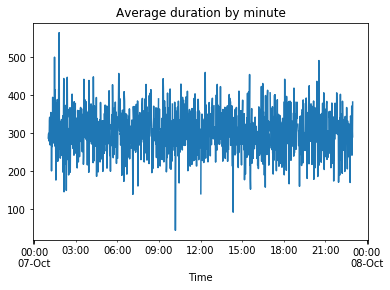

In [233]:
websites.resample('1min').mean().plot(legend=False)
plt.title('Average duration by minute')
plt.xlabel('Time')
plt.show()

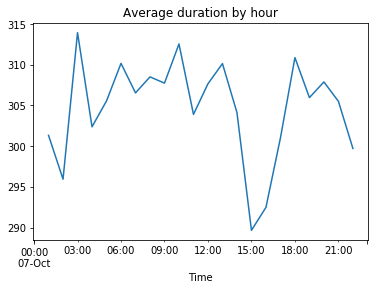

In [234]:
websites.resample('H').mean().plot(legend=False)
plt.title('Average duration by hour')
plt.xlabel('Time')
plt.show()

### Problem 5

In [262]:
p_diff = (djia - djia.shift(1)).dropna()

Day with the biggest gain...

In [269]:
p_diff.sort_values()[-1:]

DATE
2008-10-13    936.42
Name: VALUE, dtype: float64

Day with the biggest loss..

In [270]:
p_diff.sort_values()[:1]

DATE
2008-09-29   -777.68
Name: VALUE, dtype: float64

Month with the biggest gain..

In [276]:
djia_monthly = djia.resample('M').first()
m_diff = (djia_monthly - djia_monthly.shift(1)).dropna()
m_diff.sort_values()[-1:]

DATE
2015-11-30    1556.75
Name: VALUE, dtype: float64

Month with the biggest loss..

In [277]:
m_diff.sort_values()[:1]

DATE
2015-09-30   -1539.85
Name: VALUE, dtype: float64

### Problem 6

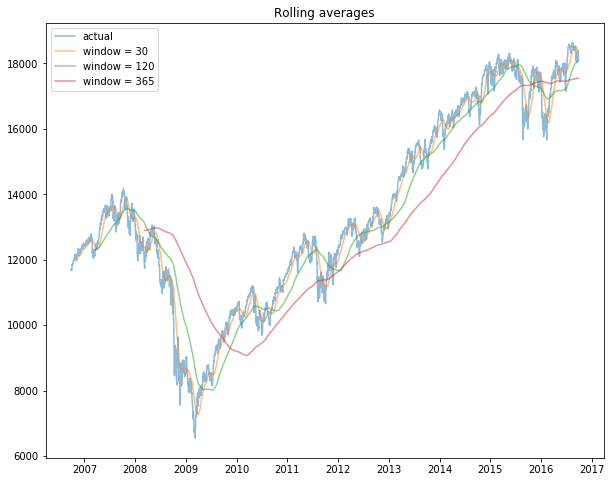

In [304]:
windows = [30, 120, 365]

plt.figure(figsize=(10, 8))
plt.plot(djia, alpha=0.5, label='actual')

for w in windows:
    plt.plot(djia.rolling(window=w).mean(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling averages')
plt.legend()
plt.show()

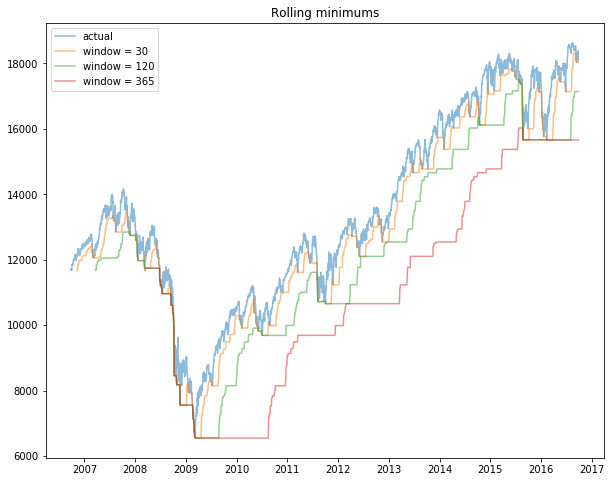

In [305]:
plt.figure(figsize=(10, 8))
plt.plot(djia, alpha=0.5, label='actual')

for w in windows:
    plt.plot(djia.rolling(window=w).min(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling minimums')
plt.legend()
plt.show()

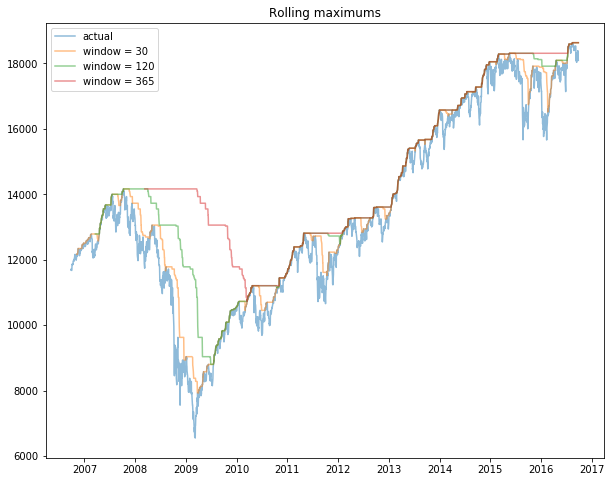

In [306]:
plt.figure(figsize=(10, 8))
plt.plot(djia, alpha=0.5, label='actual')

for w in windows:
    plt.plot(djia.rolling(window=w).max(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling maximums')
plt.legend()
plt.show()

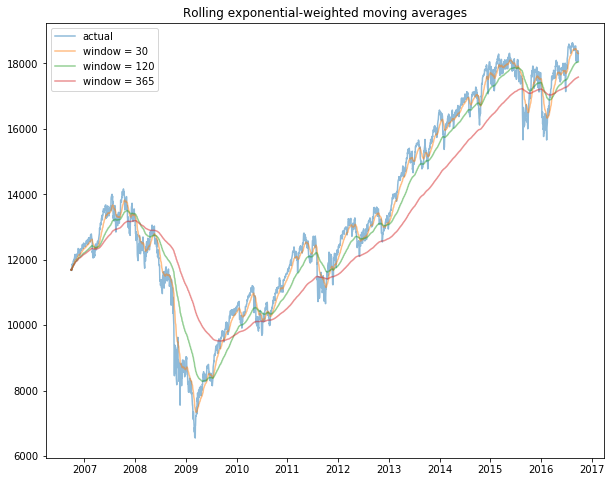

In [307]:
plt.figure(figsize=(10, 8))
plt.plot(djia, alpha=0.5, label='actual')

for w in windows:
    plt.plot(djia.ewm(span=w).mean(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling exponential-weighted moving averages')
plt.legend()
plt.show()